# A Standard Virus Load Function: Influenza data application

Here we consider a virus load function with three main phases given by

$$V(t)=v_1(t)v_2(t)v_3(t),$$

where $v _1$ describes the initial growth phase between $a _1$ and $a _2$ , $v _2$ the intermediate slow decay
phase between $a _2$ and $b _1$, and $v _3$ the final decay phase between $b _1$ and $b _2$. These functions are given as sigmoid and exponential functions, respectively

$$
\begin{aligned}
v_1(t) & = 1 + \frac{\max - 1}{2} \left[ \tanh \left( \frac{6}{a_2 - a_1} \left( t - \frac{a_1 + a_2}{2} \right) - \tanh  \left( -3\frac{a_2 + a_1}{a_2 - a_1} \right) \right) \right] \\
v_2(t) & = (1 - H(t - a_2)) + H(t - a_2)e^{-\alpha(t - a_2)} \\
v_3(t) & = 1 - \frac{1 - \min}{2} \left[ \tanh \left( \frac{6}{b_2 - b_1} \left( t - \frac{b_1 + b_2}{2} \right) - \tanh  \left( -3\frac{b_2 + b_1}{b_2 - b_1} \right) \right) \right],
\end{aligned}
$$

where $H(t)$ denotes the Heaviside function.




In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
from VirusLoadFunction import VirusLoadFunction

## Data
Using data from Smith et al. (2018), *Frontier in Microbiology*.

The dataset consists of a 13 observations of viral titers (in log10 scale) from the lung of 10 mice.

In [4]:
lines = open('../../data/Smith2018/Virus_Best10.txt').readlines()
data = []
for line in lines:
    data.append(np.array([float(p) for p in line.split(' ')]))
print('Size of dataset: %d' % len(data))
print('Number of observations: %d' % len(data[0]))

Size of dataset: 10
Number of observations: 13


Plot data set

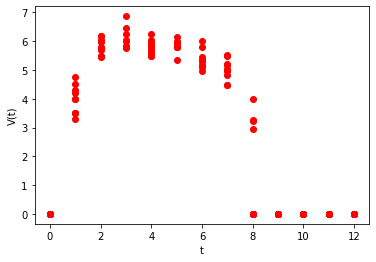

In [5]:
tdata = np.linspace(0., 12., len(data[0]))
for vdata in data:
    plt.plot(tdata, vdata, 'ro')
plt.xlabel('t')
plt.ylabel('V(t)')
plt.show()

## Fitting the model

Take the average to fit the model

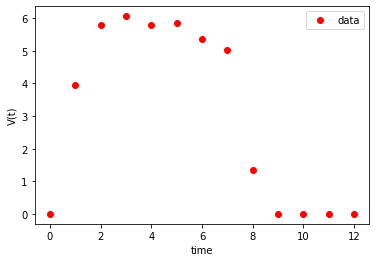

In [13]:
vdata_avg = np.average(data, axis=0)
vl = VirusLoadFunction(tdata, vdata_avg)
fig = vl.Plot()

The initial guess can be inferred from this plot. I'm using Thoma's best guess.

In [14]:
vl.InitialGuess(1.0, 2.2, 7., 9.5, 0.5, 1e-6, 1e6)
vl.Fit()

In [20]:
np.std(data, axis=1)

array([2.64604463, 2.64861132, 2.54538622, 2.617644  , 2.85923278,
       2.74434423, 2.59637889, 2.78449913, 2.76398883, 2.76134115])

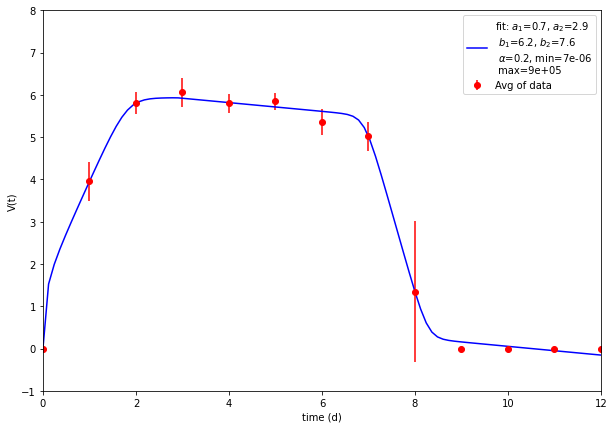

In [46]:
fig = plt.figure(figsize=(10, 7))
plt.errorbar(tdata, vdata_avg, yerr=np.std(data, axis=0), fmt='ro', color='red', label='Avg of data')
ttdata = np.linspace(np.min(tdata), np.max(tdata), num=100)
plt.plot(ttdata, vl.VirusLoad(ttdata, *vl.par), 'b-',
         label='fit: $a_1$=%2.1f, $a_2$=%2.1f\n $b_1$=%2.1f, $b_2$=%2.1f\n $\\alpha$=%2.1f, min=%1.0e\n max=%1.0e' % tuple(vl.par))
# for vdata in data:
#     plt.plot(tdata, vdata, 'go')
# plt.plot(tdata, data[0], 'go', label='Data set')
plt.xlim((0., 12.))
plt.xlabel('time (d)')
plt.ylim((-1., 8.))
plt.ylabel('V(t)')
plt.legend()
plt.show()

The best fit is given by the estimated values (with standard error) and corresponding RSS.

In [47]:
print('\nEstimated parameter values:')
print('   \ta_1 \ta_2 \tb_1 \tb_2 \talpha \tmin \tmax')
print(' Est.\t%2.1f \t%2.1f \t%2.1f \t%2.1f \t%2.1f \t%1.0e \t%1.0e' % tuple(vl.par))
print(' SE \t%1.0e \t%1.0e \t%1.0e \t%1.0e \t%1.0e \t%1.0e \t%1.0e' % tuple(np.diag(vl.pcov)))
print('\nRSS: %4.2e' % vl.RSS)


Estimated parameter values:
   	a_1 	a_2 	b_1 	b_2 	alpha 	min 	max
 Est.	0.7 	2.9 	6.2 	7.6 	0.2 	7e-06 	9e+05
 SE 	1e-02 	2e-01 	2e-02 	4e-03 	1e-02 	3e-11 	4e+10

RSS: 4.00e+00


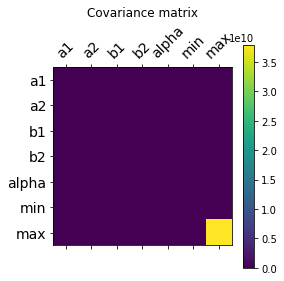

In [48]:
vl.pcov
plt.matshow(vl.pcov, vmin=0)
plt.colorbar()
plt.xticks(range(7), ['a1', 'a2', 'b1', 'b2', 'alpha', 'min', 'max'], fontsize=14, rotation=45)
plt.yticks(range(7), ['a1', 'a2', 'b1', 'b2', 'alpha', 'min', 'max'], fontsize=14)
plt.title('Covariance matrix')
plt.show()